<a href="https://colab.research.google.com/github/NekoFang/ISYS2001/blob/main/James.Duong_weatherwise_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [ ]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install pyinputplus
!pip install matplotlib

In [ ]:
import os

os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au'
os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2'
os.environ['HANDS_ON_AI_API_KEY'] = input('Enter your API key: ')

## 📦 Setup and Configuration
Import required packages and setup environment.

In [ ]:
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip
# ✅ Import after installing (if needed)


# Add any other setup code here

## 🌤️ Weather Data Functions

In [ ]:
# Define get_weather_data() function here
def get_weather_data(location, forecast_days=5):
    """
    Retrieve weather data for a specified location.

    Args:
        location (str): City or location name
        forecast_days (int): Number of days to forecast (1-5)

    Returns:
        dict: Weather data including current conditions and forecast
    """
    pass

## 📊 Visualisation Functions

In [ ]:
# Define create_temperature_visualisation() and create_precipitation_visualisation() here
def create_temperature_visualisation(weather_data, output_type='display'):
    """
    Create visualisation of temperature data.

    Args:
        weather_data (dict): The processed weather data
        output_type (str): Either 'display' to show in notebook or 'figure' to return the figure

    Returns:
        If output_type is 'figure', returns the matplotlib figure object
        Otherwise, displays the visualisation in the notebook
    """
    pass


In [ ]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime

def fetch_weather_data(location):
    """Fetch JSON weather data for the given location from wttr.in."""
    url = f"https://wttr.in/{location}?format=j1"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        return response.json()
    except requests.RequestException as e:
        print(f"[Error] Could not fetch weather data: {e}")
        return None

def extract_temperatures(data, days=3):
    """
    From the wttr.in JSON, pull out the temperatures at
    morning (09:00), noon (12:00), evening (18:00), night (21:00)
    for up to `days` days.
    """
    time_map = {
        'morning': '900',
        'noon':    '1200',
        'evening': '1800',
        'night':   '2100'
    }
    dates = []
    temps = {label: [] for label in time_map}

    for day in data.get('weather', [])[:days]:
        dates.append(datetime.strptime(day['date'], "%Y-%m-%d").date())
        hourly = day.get('hourly', [])
        for label, t in time_map.items():
            entry = next((h for h in hourly if h.get('time') == t), None)
            temps[label].append(int(entry['tempC']) if entry else None)

    return dates, temps

def plot_temperature_trend(location, days=3):
    """Fetch, extract and plot the temperature trend."""
    data = fetch_weather_data(location)
    if not data:
        return

    dates, temps = extract_temperatures(data, days)
    # Create day-of-week labels for the x-axis
    day_labels = [d.strftime("%a") for d in dates]

    plt.figure()
    for label, values in temps.items():
        plt.plot(day_labels, values, label=label, alpha=0.5)  # 50% transparency
    plt.title(f"{location} {days}-Day Temperature Trend")
    plt.xlabel("Day")
    plt.ylabel("Temperature (°C)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    loc = input("Enter location (e.g., London): ")
    plot_temperature_trend(loc)


Enter location (e.g., Perth): Perth


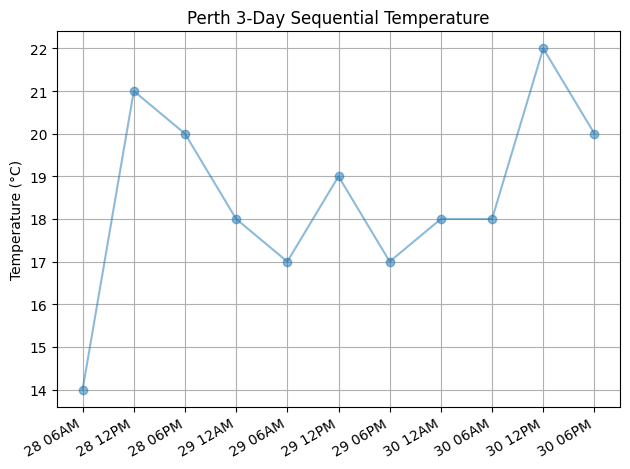

In [2]:
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

def fetch_weather_data(location):
    """Fetch JSON weather data for the given location from wttr.in."""
    url = f"https://wttr.in/{location}?format=j1"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        return response.json()
    except requests.RequestException as e:
        print(f"[Error] Could not fetch weather data: {e}")
        return None

def extract_sequential_temperatures(data, days=3):
    """
    Build a sequential time series of temperatures at 6am, 12pm, 6pm, and midnight
    across `days` days, including the midnight entry at the end of each day.
    """
    time_codes = ['600', '1200', '1800', '0']
    datetimes = []
    temps = []
    weather_days = data.get('weather', [])[:days]

    for i, day in enumerate(weather_days):
        date_str = day['date']
        hourly = day.get('hourly', [])
        for code in time_codes:
            if code == '0':  # midnight belongs to the next day
                if i + 1 < len(weather_days):
                    next_date = weather_days[i + 1]['date']
                    dt = datetime.strptime(f"{next_date} 0000", "%Y-%m-%d %H%M")
                    entry = next((h for h in weather_days[i + 1]['hourly'] if h.get('time') == '0'), None)
                else:
                    continue
            else:
                dt = datetime.strptime(f"{date_str} {code.zfill(4)}", "%Y-%m-%d %H%M")
                entry = next((h for h in hourly if h.get('time') == code), None)
            if entry:
                datetimes.append(dt)
                temps.append(int(entry['tempC']))

    return datetimes, temps

def plot_sequential_temperature_trend(location, days=3):
    data = fetch_weather_data(location)
    if not data:
        return

    times, temperatures = extract_sequential_temperatures(data, days)

    fig, ax = plt.subplots()
    ax.plot(times, temperatures, marker='o', alpha=0.5)
    ax.set_title(f"{location} {days}-Day Sequential Temperature")
    ax.set_ylabel("Temperature (°C)")
    ax.set_xticks(times)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %I%p'))
    fig.autofmt_xdate()
    ax.grid(True)
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    loc = input("Enter location (e.g., Perth): ")
    plot_sequential_temperature_trend(loc)


In [ ]:

def create_precipitation_visualisation(weather_data, output_type='display'):
    """
    Create visualisation of precipitation data.

    Args:
        weather_data (dict): The processed weather data
        output_type (str): Either 'display' to show in notebook or 'figure' to return the figure

    Returns:
        If output_type is 'figure', returns the matplotlib figure object
        Otherwise, displays the visualisation in the notebook
    """
    pass

## 🤖 Natural Language Processing

In [ ]:
# Define parse_weather_question() and generate_weather_response() here
def parse_weather_question(question):
    """
    Parse a natural language weather question.

    Args:
        question (str): User's weather-related question

    Returns:
        dict: Extracted information including location, time period, and weather attribute
    """
    pass

## 🧭 User Interface

In [ ]:
# Define menu functions using pyinputplus or ipywidgets here

## 🧩 Main Application Logic

In [ ]:
# Tie everything together here
def generate_weather_response(parsed_question, weather_data):
    """
    Generate a natural language response to a weather question.

    Args:
        parsed_question (dict): Parsed question data
        weather_data (dict): Weather data

    Returns:
        str: Natural language response
    """
    pass

## 🧪 Testing and Examples

## 🗂️ AI Prompting Log (Optional)
V1. Capable of gathering weather data from wttr.in with data input

v2. Added looping process without needing to restart code

v3. Added displaying geograhical location and the time at which the data was gathered

v4. Changed from universal time to AWST to make it more accessible

v5. Added temperature visualisation for specific time trends

v6. Changed from 5 to 3 day spread, x label changed to only display the day e.g. (28th), and made lines slightly transparent in order to view overlapping data better

v7. Added temperature visualisation for sequential/continuous time

# 💻Current Working Code

In [ ]:
import requests
import pyinputplus as pyip
from datetime import datetime, timedelta, timezone

def convert_observation_time_manual_perth(observation_time_utc_str):
    """
    Converts UTC time string (e.g., '03:03 AM') to AWST (UTC+8) manually.
    """
    try:
        # Step 1: Parse the time string into a time object
        obs_time = datetime.strptime(observation_time_utc_str, "%I:%M %p").time()

        # Step 2: Combine with today's date (UTC)
        obs_datetime_utc = datetime.combine(datetime.utcnow().date(), obs_time)

        # Step 3: Manually add 8 hours for AWST (UTC+8)
        obs_awst = obs_datetime_utc + timedelta(hours=8)

        # Step 4: Return formatted string with AWST label
        return obs_awst.strftime("%I:%M %p (AWST)")
    except Exception as e:
        return f"[Time Conversion Error: {e}]"

def get_weather_data(location):
    """
    Fetches weather data from wttr.in for the given location.
    """
    url = f"https://wttr.in/{location}?format=j1"
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        return response.json()
    except requests.RequestException as e:
        print(f"[Error] Could not fetch weather data: {e}")
        return None

def display_weather(location):
    """
    Displays current weather and a 3-day forecast for the location.
    Also shows location and observation time (AWST).
    """
    data = get_weather_data(location)
    if not data:
        return

    # --- Extract Location Info ---
    area = data['nearest_area'][0]['areaName'][0]['value']
    region = data['nearest_area'][0]['region'][0]['value']
    country = data['nearest_area'][0]['country'][0]['value']

    print(f"\nWeather for: {area}, {region}, {country}")
    print("-" * 50)

    # --- Current Conditions ---
    current = data['current_condition'][0]
    observation_time = current['observation_time']
    local_obs_time = convert_observation_time_manual_perth(observation_time)

    print(f"Current Temp: {current['temp_C']}°C")
    print(f"Condition: {current['weatherDesc'][0]['value']}")
    print(f"Data last updated at: {local_obs_time}\n")

    # --- 3-Day Forecast ---
    days = data['weather'][:3]
    for day in days:
        date = day['date']
        maxtemp = day['maxtempC']
        mintemp = day['mintempC']
        rain_chance = day['hourly'][4]['chanceofrain']
        print(f"Date: {date}")
        print(f"High: {maxtemp}°C, Low: {mintemp}°C, Rain: {rain_chance}%\n")

def main():
    """
    Main loop that keeps asking for locations until user exits.
    """
    print("🌤️ Welcome to Weather Advisor!")

    while True:
        location = input("\nEnter a location to view the weather: ")
        display_weather(location)

        repeat = pyip.inputMenu(["Yes", "No"], prompt="Would you like to check another location?\n", numbered=True)
        if repeat == "No":
            print("Thank you for using Weather Advisor! Stay safe! ☔")
            break

if __name__ == "__main__":
    main()